In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, grad, config
import jaxquantum as jqt
import jaxquantum.devices as jqtd
import jax.numpy as jnp
from tqdm import tqdm
import matplotlib.pyplot as plt

config.update("jax_enable_x64", True)

/opt/miniconda3/envs/jax-framework/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
Ec_q = 5
Ej_q = 15
m = 3
N = 10

snail = jqtd.SNAIL.create(
    2*m*N+1,
    {"Ec": Ec_q, "Ej": Ej_q, "m": m, "alpha": 0.29, "phi_ext": 0.41},
    N_pre_diag=2*m*N+1,
    basis=jqtd.BasisTypes.charge,
    hamiltonian=jqtd.HamiltonianTypes.full,
)

In [4]:
snail.eig_systems["vals"]

Array([-3.66400769e+01, -2.53862018e+01, -1.30774064e+01, -3.43652778e-01,
        1.21255018e+01,  2.37654131e+01,  3.35197456e+01,  4.26289519e+01,
        4.49515983e+01,  6.03284580e+01,  6.05265867e+01,  8.32798767e+01,
        8.32879676e+01,  1.11273098e+02,  1.11273317e+02,  1.44037177e+02,
        1.44037182e+02,  1.81429448e+02,  1.81429449e+02,  2.23377835e+02,
        2.23377835e+02,  2.69842750e+02,  2.69842750e+02,  3.20800831e+02,
        3.20800831e+02,  3.76237513e+02,  3.76237513e+02,  4.36143313e+02,
        4.36143313e+02,  5.00511834e+02,  5.00511834e+02,  5.69338629e+02,
        5.69338629e+02,  6.42620529e+02,  6.42620529e+02,  7.20355223e+02,
        7.20355223e+02,  8.02540996e+02,  8.02540996e+02,  8.89176552e+02,
        8.89176552e+02,  9.80260895e+02,  9.80260895e+02,  1.07579325e+03,
        1.07579325e+03,  1.17577302e+03,  1.17577302e+03,  1.28019971e+03,
        1.28019971e+03,  1.38907293e+03,  1.38907293e+03,  1.50239238e+03,
        1.50239238e+03,  

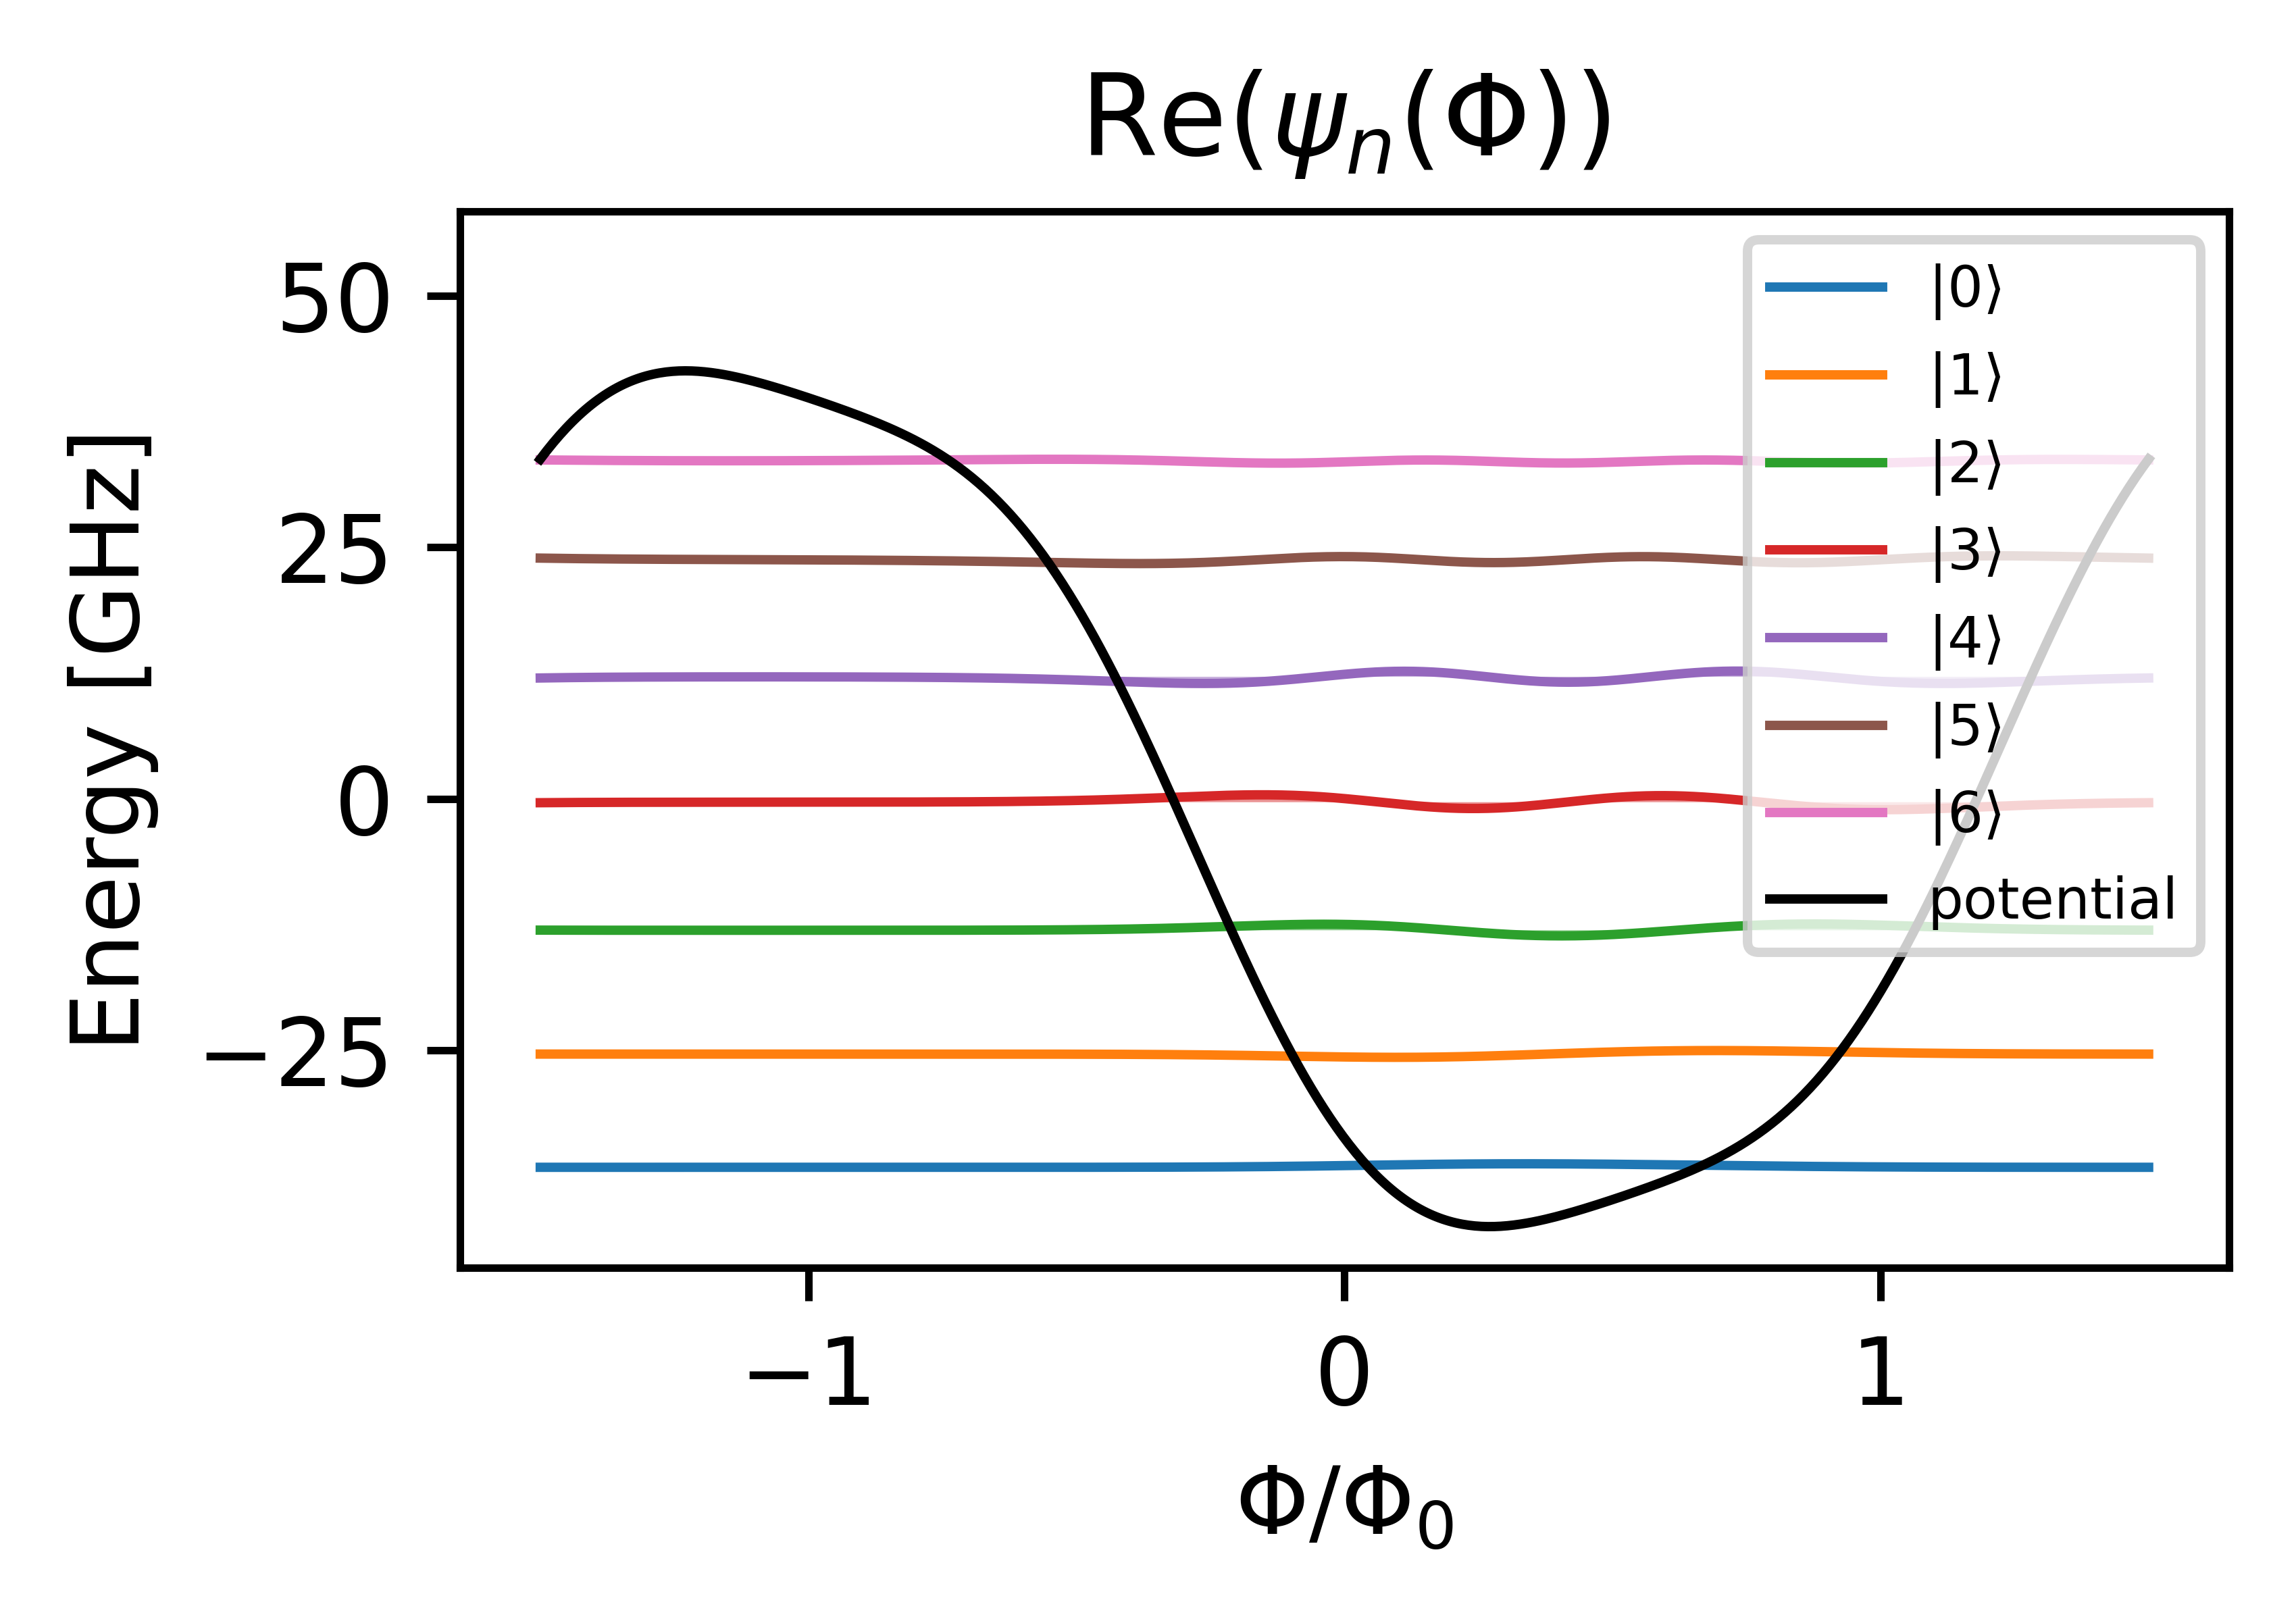

In [10]:
offset = snail.eig_systems["vals"][0] - 10
Ej = snail.params["Ej"]
ylim = [offset, offset + 7*Ej]
phi_vals = jnp.linspace(-0.5*m,0.5*m,500)
axs = snail.plot_wavefunctions(phi_vals, max_n = 7, mode="real", ylim=ylim)